In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

%matplotlib inline


In [2]:
file_path_in_sample='C:\\Users\\jason.huang\\research\\data_mining\\pattern_technical_indicator\\'
file_path_out_of_sample='C:\\Users\\jason.huang\\research\\data_mining\\pattern_technical_indicator_out_of_sample\\'

for file_name in os.listdir(file_path_in_sample):
    in_sample_data=pd.read_csv(file_path_in_sample+file_name,index_col=0)
    in_sample_date=in_sample_data.index[-1]
    print(file_name+'         '+in_sample_date+'       '+str(len(in_sample_data.columns)))

factor_20220921_155700.csv         2021-09-15       41
factor_20220921_163006.csv         2021-09-15       8
factor_20220921_164013.csv         2021-09-15       32
factor_20220921_165714.csv         2021-09-15       53
factor_20220921_171903.csv         2021-09-15       158
factor_20220921_172557.csv         2022-08-15       14
factor_20220922_133832.csv         2022-08-15       91
factor_20220922_175357.csv         2021-09-15       35


In [3]:
file_name='factor_20220922_175357.csv'

in_sample_data=pd.read_csv(file_path_in_sample+file_name,index_col=0)
in_sample_date=in_sample_data.index[-1]
in_sample_date

'2021-09-15'

In [4]:
data=pd.read_csv(file_path_out_of_sample+file_name,index_col=0)
data.index=[datetime.datetime.strptime(x,"%Y-%m-%d") for x in data.index]
index1=np.where(data.index==in_sample_date)[0][0]

d1=data.iloc[:index1,]
d2=data.iloc[index1:,]

indicator=pd.DataFrame()
for i in range(len(data.columns)):
    indicator.loc[i,'Factor']=data.columns[i]
    indicator.loc[i,'Ret_in_sample']=d1.iloc[:,i].diff().mean()*252
    indicator.loc[i,'IR_in_sample']=d1.iloc[:,i].diff().mean()/d1.iloc[:,i].diff().std()*15.8
    indicator.loc[i,'MDD_in_sample']=np.min((d1.iloc[:,i]/d1.iloc[:,i].cummax()-1))
    
    indicator.loc[i,'Ret_out_of_sample']=d2.iloc[:,i].diff().mean()*252
    indicator.loc[i,'IR_out_of_sample']=d2.iloc[:,i].diff().mean()/d2.iloc[:,i].diff().std()*15.8
    indicator.loc[i,'MDD_out_of_sample']=np.min((d2.iloc[:,i]/d2.iloc[:,i].cummax()-1))
    

In [5]:
indicator.index=indicator['Factor']
indicator=indicator.iloc[:,1:]
indicator=indicator.drop_duplicates().reset_index()
indicator=indicator.sort_values('IR_in_sample').reset_index(drop=True)
indicator

,Factor,Ret_in_sample,IR_in_sample,MDD_in_sample,Ret_out_of_sample,IR_out_of_sample,MDD_out_of_sample
0,"both5(openjumphigh(), Ndayup(int_10()), longup...",0.011472,1.998677,-0.002758,-0.001595,-0.204048,-0.006524
1,"both5(openjumphigh(), Ndayup(int_10()), longup...",0.013280,2.000481,-0.002834,-0.002301,-0.274896,-0.008792
2,"both5(openjumphigh(), Ndayup(int_10()), longup...",0.014505,2.036997,-0.003577,0.001546,0.171274,-0.004952
3,"both5(openjumphigh(), Ndayup(int_10()), longup...",0.014507,2.037408,-0.003577,0.001546,0.171274,-0.004952
4,"both5(openjumphigh(), Ndayup(int_10()), longup...",0.014512,2.037995,-0.003577,0.001546,0.171274,-0.004952
5,"both5(openjumphigh(), Ndayup(int_10()), longup...",0.014514,2.038406,-0.003577,0.001546,0.171274,-0.004952
6,"both5(openjumphigh(), Ndayup(int_10()), longup...",0.013065,2.052352,-0.003259,0.002352,0.286852,-0.005385
7,"both5(openjumphigh(), Ndayup(int_10()), longup...",0.014372,2.057627,-0.004180,-0.001694,-0.194568,-0.007581
8,"both5(openjumphigh(), Ndayup(int_10()), longup...",0.014010,2.067010,-0.003162,0.003916,0.500186,-0.003955
9,"both5(openjumphigh(), Ndayup(int_10()), longup...",0.013944,2.083911,-0.002768,-0.001488,-0.180590,-0.006725


Text(0.5, 1.0, 'all')

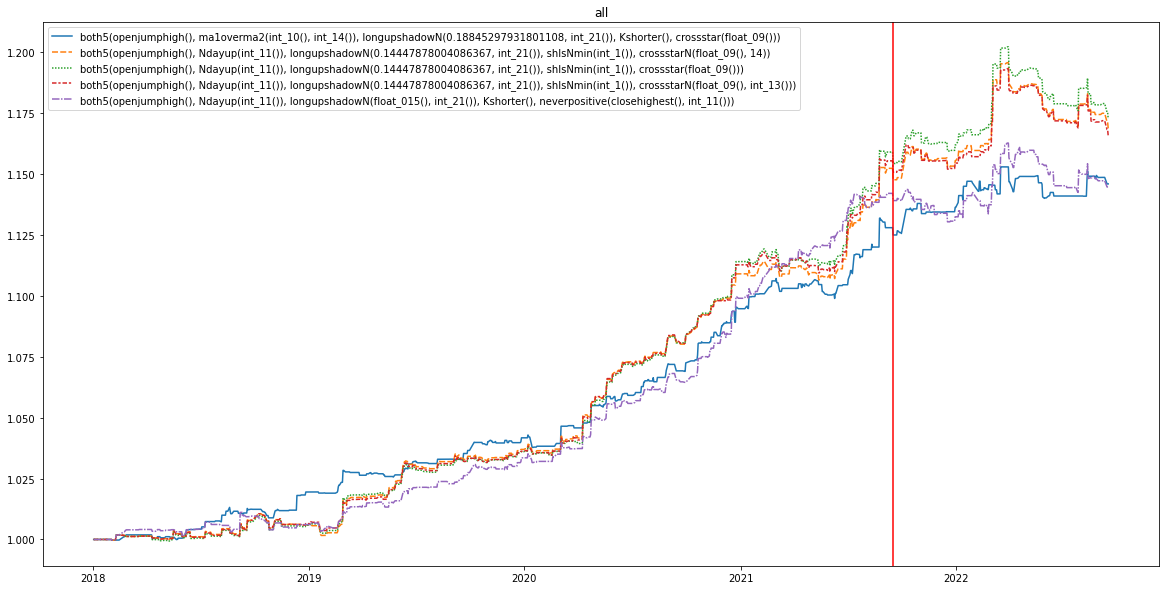

In [6]:
plt.rcParams['figure.figsize'] = [20,10]
sns.lineplot(data=data.loc[:,indicator['Factor'][-5:]])
plt.axvline(x=datetime.datetime.strptime(in_sample_date,"%Y-%m-%d"),color='r')
plt.title('all')